0.09750000000000003


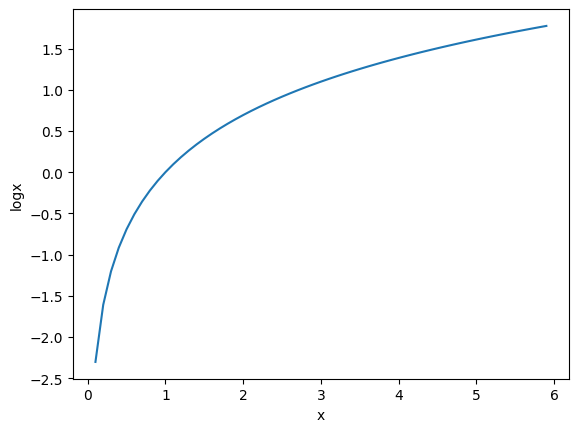

In [46]:
import numpy as np
import matplotlib.pyplot as plt
#损失函数(loss function)-均方误差(mean_squared_error)
def mean_squared_error(y,t):
    """
    y:神经网络的输出
    t:监督数据(one_hot 表示)
    """
    return 0.5* np.sum((y-t)**2)
    
y=[0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
t=[0,0,1,0,0,0,0,0,0,0] # one_hot表示
out= mean_squared_error(np.array(y),np.array(t))
print(out)
    

def log_f(x):
    return np.log(x)

x=np.arange(0.1,6,0.1)
y=log_f(x)
plt.xlabel("x")
plt.ylabel("logx")
plt.plot(x,y)
plt.show()



#损失函数(loss function)-交叉熵误差(cross entropy error)
def cross_entropy_error(y,t):
     delta=1e-7  # 防止y[i]=0
     return -np.sum( t*np.log(y+delta))





In [47]:
# mini-batch:从训练数据中随机选取部分数据进行学习叫做mini-batch学习
from dataset.mnist  import load_mnist
(x_train,t_train),(x_test,t_test)= load_mnist(normalize=True,one_hot_label=True)
print(x_train.shape)
batch_size=10
batch_mask=np.random.choice(x_train.shape[0],batch_size)
print(batch_mask)
x_batch= x_train[batch_mask]
print(x_batch.shape)


(60000, 784)
[34065 32545 26898  5367 44216 38768 52767  5910 12156 35845]
(10, 784)


In [48]:
#mini-batch 版的交叉熵误差
def cross_entropy_error(y ,t):
    """
    y:神经网络的输出
    t:监督数据(one_hot 表示)
    """
    if y.ndim==1:
        t=t.reshape(1,t.size)
        y=y.reshape(1,y.size)

    batch_size=y.shape[0]
    return -np.sum( t*np.log(y+1e-7))/batch_size

    
def cross_entropy_error(y ,t):
    """
    y:神经网络的输出
    t:监督数据(no_one_hot 表示)
    """
    if y.ndim==1:
        t=t.reshape(1,t.size)
        y=y.reshape(1,y.size)

    batch_size=y.shape[0]
    return  -np.sum(np.log(y[np.arange(batch_size),t]+1e-7))/batch_size


In [49]:
# 数值微分（numerical differentiation）:通过数值方式近似求解函数的导数的过程
def numerical_diff(f,x):
    """
    f:执行函数
    x:f的参数
    """
    return (f(x+ 1e-4)-f(x-1e-4))/2*(1e-4)

# 偏导数:有多个变量的函数的导数;eg:f(x0,x1)=ax0+bx1;分别对x0和x1求导

#梯度(gradient):由函数全部变量的偏导数汇总而成的向量称为梯度
def _numerical_gradient_no_batch(f,x):
    grad= np.zeros_like(x)
    h=1e-4
    for i in range(x.size):
        tmp=x[i]
        x[i]=tmp+h
        fxh1=f(x)

        x[i]=tmp-h
        fxh2= f(x)

        grad[i]=(fxh1-fxh2)/(2*h)
        x[i]=tmp
    return grad


func1=lambda x:np.sum(x**2)
out=_numerical_gradient_no_batch(func1,np.array([3.0,4.0]))
print(out)

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad
    


[6. 8.]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


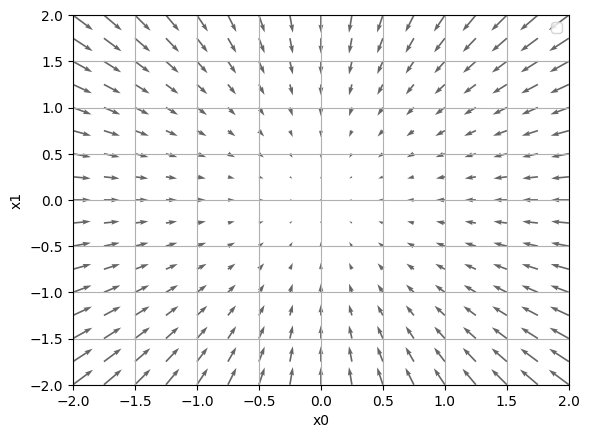

In [50]:
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(func1, np.array([X, Y]) )

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()
plt.show()

梯度法：沿着梯度方向前进，逐渐减小函数值的过程就是梯度法

$$
x_0=x_0-\eta \frac{\partial y}{\partial x_0} 
$$

$$
x_1=x_1-\eta \frac{\partial y}{\partial x_1} 
$$

$\eta$: 学习率(learning rate),决定了一次学习中，应该学习多少，以及在多大程度更新参数;learning rate这种参数也叫超参数，由人工设定的

In [51]:
# 梯度下降法
def gradient_descent(f,init_x,lr=0.01,step_num=100):
    x=init_x
    x_history = []
    for i in range(step_num):
        x_history.append( x.copy() )
        grad= numerical_gradient(f,x)
        x-=lr*grad
    return x,np.array(x_history)

# 求func1的最小值
out,x_histroy=gradient_descent(func1,np.array([-3.0,4.0]),lr=0.1,step_num=100)
print(out)
        

[-6.11110793e-10  8.14814391e-10]


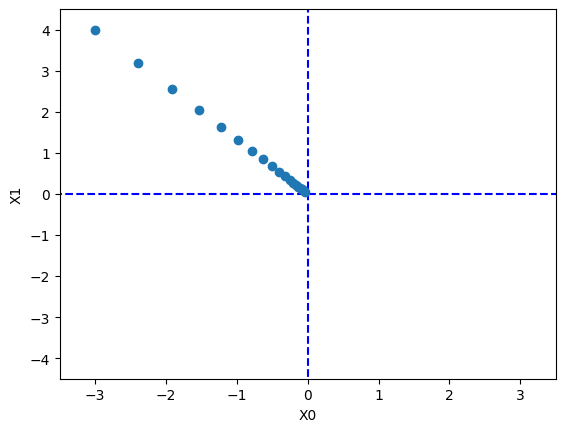

In [52]:
lr = 0.1
step_num = 20
init_x = np.array([-3.0, 4.0])    
x, x_history = gradient_descent(func1, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()


神经网络的梯度

$$
W=\begin{pmatrix}  
  w_{11} & w_{12} & w_{13} \\  
  w_{21} & w_{22} & w_{23} \\  
  w_{31} & w_{32} & w_{33}  
\end{pmatrix}
$$
$$
\frac{\partial L}{\partial W} 
=\begin{pmatrix}  
  \frac{\partial L}{\partial W_{11}} & \frac{\partial L}{\partial w_{12}} & \frac{\partial L}{\partial w_{13}} \\  
  \frac{\partial L}{\partial W_{21}} & \frac{\partial L}{\partial w_{22}} & \frac{\partial L}{\partial w_{23}} \\  
  \frac{\partial L}{\partial W_{31}} & \frac{\partial L}{\partial w_{32}} & \frac{\partial L}{\partial w_{33}} \\  
\end{pmatrix}
$$
$\partial L$ : 损失函数

$W$ : 权重

$ \frac{\partial L}{\partial W} $:梯度
 

In [53]:
from deaplearn import softmax
from deaplearn import cross_entropy_error
# 实现神经网络梯度
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) #高斯分布初始化W

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)

[[ 0.09574087 -0.39659707  0.3008562 ]
 [ 0.1436113  -0.5948956   0.4512843 ]]
